In [1]:
import pandas as pd
import yfinance as yf
df = yf.download("AAPL", start="2020-01-01", auto_adjust = True)
df

[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2020-01-02,72.400490,72.460753,71.156652,71.409755,135480400
2020-01-03,71.696625,72.455943,71.472447,71.629130,146322800
2020-01-06,72.267937,72.306506,70.568510,70.819208,118387200
2020-01-07,71.928062,72.533103,71.708703,72.277586,108872000
2020-01-08,73.085106,73.386423,71.631552,71.631552,132079200
...,...,...,...,...,...
2026-02-17,263.880005,266.290009,255.539993,258.049988,58469100
2026-02-18,264.350006,266.820007,262.450012,263.600006,34203300


In [13]:
returns = df["Close"] / df["Close"].shift(1) - 1
returns

Ticker,AAPL
Date,
2020-01-02,NaN
2020-01-03,-0.009722
2020-01-06,0.007968
2020-01-07,-0.004703
2020-01-08,0.016086
...,...
2026-02-17,0.031668
2026-02-18,0.001781
2026-02-19,-0.014261


In [3]:
returns = returns.dropna()
returns

Ticker,AAPL
Date,
2020-01-03,-0.009722
2020-01-06,0.007968
2020-01-07,-0.004703
2020-01-08,0.016086
2020-01-09,0.021241
...,...
2026-02-17,0.031668
2026-02-18,0.001781
2026-02-19,-0.014261


<Axes: title={'center': 'Stock Price Over Time (AAPL)'}, xlabel='Date'>

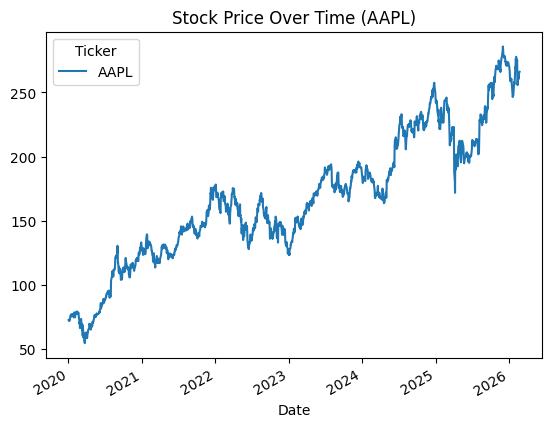

In [4]:
df["Close"].plot(title="Stock Price Over Time (AAPL)")

<Axes: title={'center': 'Daily Returns (AAPL)'}, xlabel='Date'>

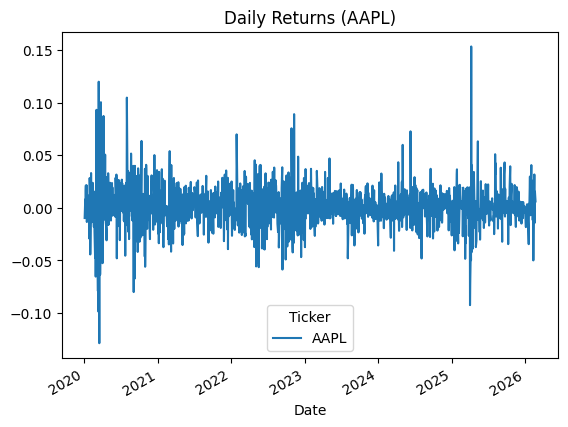

In [5]:
returns.plot(title="Daily Returns (AAPL)")

<Axes: title={'center': 'Rolling Volatility Over A Month (AAPL)'}, xlabel='Date'>

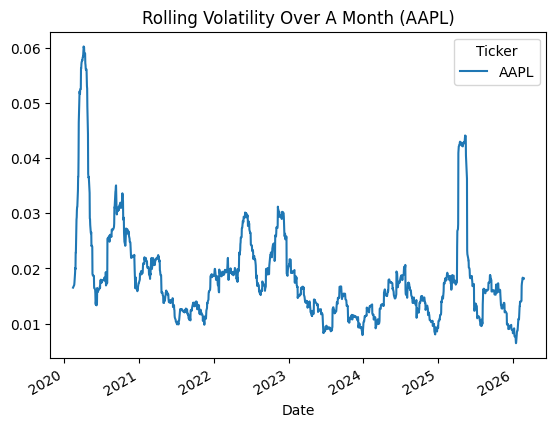

In [6]:
rolling_volatility = returns.rolling(window = 30).std()
rolling_volatility.plot(title="Rolling Volatility Over A Month (AAPL)")

[*********************100%***********************]  3 of 3 completed


<Axes: title={'center': 'Rolling Volatility Comparison'}, xlabel='Date'>

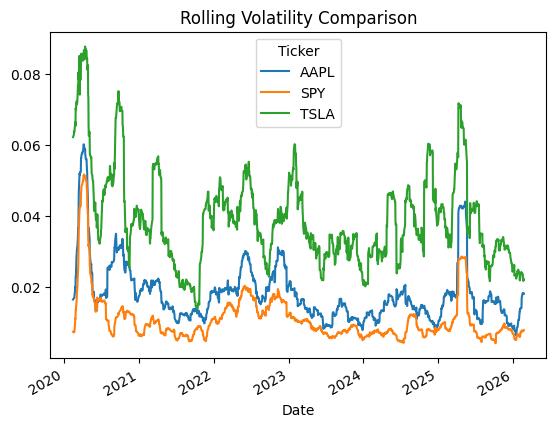

In [7]:
prices = yf.download(["AAPL", "TSLA", "SPY"], start="2020-01-01", auto_adjust=True)['Close']
returns = prices / prices.shift(1) - 1
returns = returns.dropna()

rolling_vol = returns.rolling(30).std()
rolling_vol.plot(title="Rolling Volatility Comparison")


In [8]:
returns.std()

Ticker
AAPL    0.019978
SPY     0.012969
TSLA    0.041603
dtype: float64

In [9]:
sharpe = returns.mean() / returns.std()
sharpe

Ticker
AAPL    0.052235
SPY     0.047990
TSLA    0.061800
dtype: float64

In [10]:
VaR = returns.quantile(0.05)
VaR

Ticker
AAPL   -0.030724
SPY    -0.017988
TSLA   -0.060508
Name: 0.05, dtype: float64

In [11]:
corr = returns.corr()

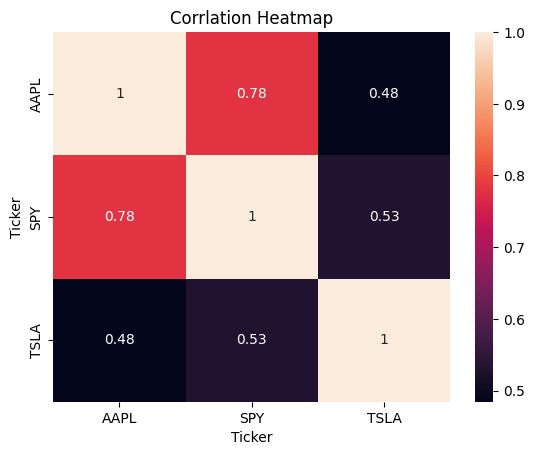

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(corr, annot=True)
plt.title("Corrlation Heatmap")
plt.show()